Importing plotly failed. Interactive plots will not work.
11:07:52 - cmdstanpy - INFO - Chain [1] start processing
11:07:53 - cmdstanpy - INFO - Chain [1] done processing


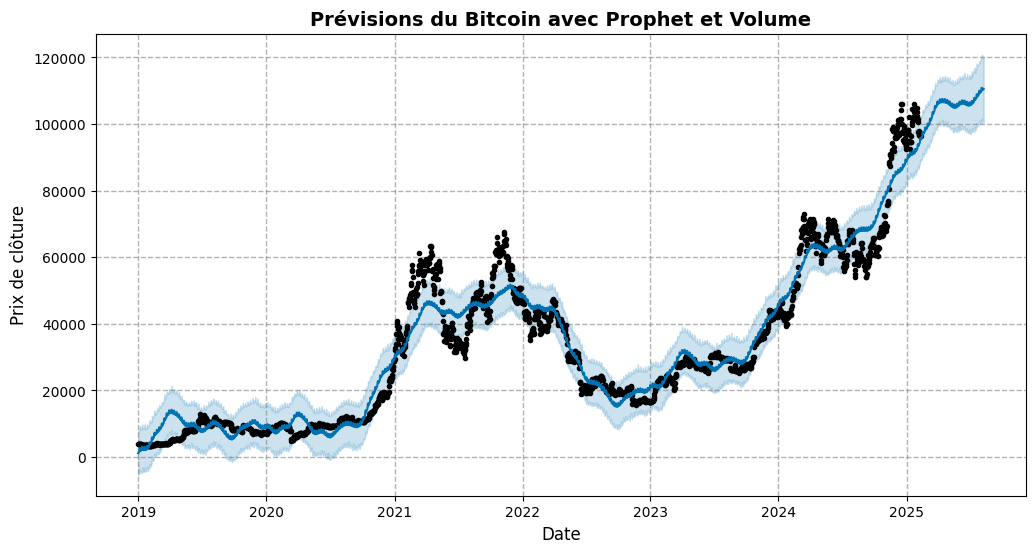

  0%|          | 0/8 [00:00<?, ?it/s]

11:07:53 - cmdstanpy - INFO - Chain [1] start processing
11:07:54 - cmdstanpy - INFO - Chain [1] done processing
11:07:54 - cmdstanpy - INFO - Chain [1] start processing
11:07:54 - cmdstanpy - INFO - Chain [1] done processing
11:07:54 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing
11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing
11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:56 - cmdstanpy - INFO - Chain [1] done processing
11:07:56 - cmdstanpy - INFO - Chain [1] start processing
11:07:57 - cmdstanpy - INFO - Chain [1] done processing
11:07:57 - cmdstanpy - INFO - Chain [1] start processing
11:07:57 - cmdstanpy - INFO - Chain [1] done processing
11:07:58 - cmdstanpy - INFO - Chain [1] start processing
11:07:58 - cmdstanpy - INFO - Chain [1] done processing


  horizon           mse         rmse          mae      mape     mdape
0 18 days  5.645195e+07  7513.451200  6703.868958  0.171342  0.186998
1 19 days  5.834103e+07  7638.129746  6840.951552  0.174513  0.189498
2 20 days  6.032077e+07  7766.644705  6964.431228  0.177165  0.194854
3 21 days  6.358609e+07  7974.088759  7153.925845  0.181635  0.196323
4 22 days  6.643454e+07  8150.738525  7321.311912  0.185850  0.197883


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,1174.175649,-5289.540285,7714.817621
1,2019-01-02,1393.495901,-4998.990161,7873.039517
2,2019-01-03,1444.073815,-4975.792673,7562.221268
3,2019-01-04,1590.759344,-4840.000349,7833.096634
4,2019-01-05,2699.070541,-3752.901050,9280.982690
5,2019-01-06,2707.143749,-3876.130627,9171.097670
6,2019-01-07,1922.600747,-4732.642863,8300.792770
7,2019-01-08,1943.191033,-4506.786401,8739.535065
8,2019-01-09,2076.903244,-4480.277004,8947.467790
9,2019-01-10,2038.333078,-4252.876247,8354.883786


In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

df = pd.read_csv("bitcoin_historical_data_cleaned.csv")

df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  
model.fit(df_prophet)
future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions du Bitcoin avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='180 days')
metrics = performance_metrics(cv_results)
print(metrics[['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape']].head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


11:10:35 - cmdstanpy - INFO - Chain [1] start processing
11:10:35 - cmdstanpy - INFO - Chain [1] done processing


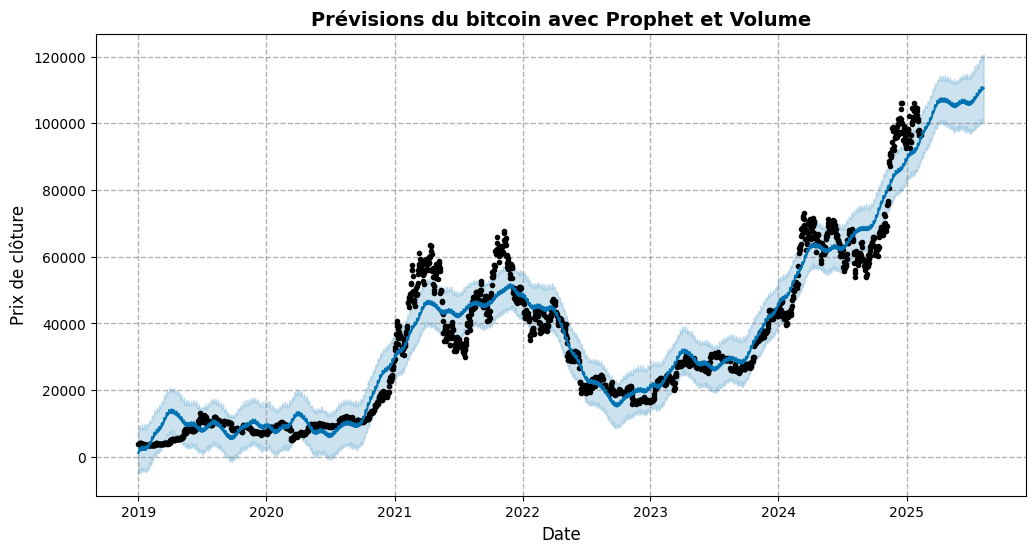

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,1174.175649,-5364.434199,7502.216713
1,2019-01-02,1393.495901,-5100.464715,7861.574408
2,2019-01-03,1444.073815,-5044.507381,7727.168202
3,2019-01-04,1590.759344,-4748.472453,8318.518658
4,2019-01-05,2699.070541,-3442.849005,9510.438993
5,2019-01-06,2707.143749,-3408.902120,9189.717564
6,2019-01-07,1922.600747,-4507.726701,8673.109203
7,2019-01-08,1943.191033,-4722.407317,8141.600158
8,2019-01-09,2076.903244,-4167.311034,8364.729332
9,2019-01-10,2038.333078,-4453.699113,8659.872925


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("bitcoin_historical_data_cleaned.csv")
df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  

model.fit(df_prophet)

future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions du bitcoin avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")


Mean Absolute Error (MAE) : 4115.79
Root Mean Squared Error (RMSE) : 5505.69
